In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
import numpy as np
import os
import tensorflow as tf
import matplotlib.pyplot as plt
from keras import callbacks
from sklearn.metrics import accuracy_score
from os import listdir
from os.path import isfile, join
from pathlib import Path
import imghdr
import tensorflow_datasets as tfds


In [4]:
PATH = r'C:\Users\...'

In [5]:
batch_size = 32
img_height = 100
img_width = 100

train_ds = tf.keras.utils.image_dataset_from_directory(
  PATH,
  validation_split=0.2,
  subset="training",
  seed=0,
  color_mode='grayscale',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 10920 files belonging to 2 classes.
Using 8736 files for training.


In [6]:
train_ds

<BatchDataset element_spec=(TensorSpec(shape=(None, 100, 100, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [7]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  PATH,
  validation_split=0.2,
  subset="validation",
  seed=0,
  color_mode='grayscale',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 10920 files belonging to 2 classes.
Using 2184 files for validation.


In [8]:
class_names = train_ds.class_names
print(class_names)

['with_mask', 'without_mask']


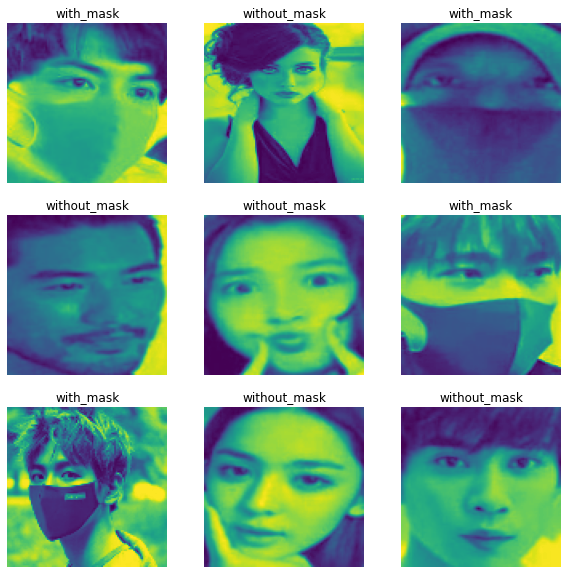

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [10]:
# autotune buffer to avoid I/0 block
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [11]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 100, 100, 1)
(32,)


In [12]:
num_classes = 2

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(200, 3, activation='relu', padding='same'),
  tf.keras.layers.MaxPooling2D(pool_size=(2,2)), 
  tf.keras.layers.Conv2D(100, 3, activation='relu', padding='same'),
  tf.keras.layers.MaxPooling2D(pool_size=(2,2)), 
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(num_classes, activation='sigmoid')
])

model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(),
  metrics=['accuracy'])

In [13]:
# defining callback function to avoid overfit
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="min", patience = 6, 
                                        restore_best_weights = True, verbose=1)

In [15]:
model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=5,
  callbacks =[earlystopping]
)

Epoch 1/5
273/273 [==============================] - 155s 568ms/step - loss: 0.2882 - accuracy: 0.8804 - val_loss: 0.2049 - val_accuracy: 0.9171
Epoch 2/5
273/273 [==============================] - 167s 610ms/step - loss: 0.1502 - accuracy: 0.9456 - val_loss: 0.1555 - val_accuracy: 0.9478
Epoch 3/5
273/273 [==============================] - 154s 564ms/step - loss: 0.1017 - accuracy: 0.9622 - val_loss: 0.1761 - val_accuracy: 0.9396
Epoch 4/5
273/273 [==============================] - 156s 573ms/step - loss: 0.0652 - accuracy: 0.9755 - val_loss: 0.1823 - val_accuracy: 0.9322
Epoch 5/5
273/273 [==============================] - 154s 566ms/step - loss: 0.0466 - accuracy: 0.9836 - val_loss: 0.2052 - val_accuracy: 0.9510


In [17]:
e = model.evaluate(val_ds)

print(f'Test set accuracy: {"{0:.2f}".format(e[1]*100)}%')

69/69 [==============================] - 9s 133ms/step - loss: 0.2052 - accuracy: 0.9510
Test set accuracy: 95.10%
